In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets

# Prepare the data set

In [2]:
digits = datasets.load_digits()

print(digits.data.shape)

#normalize values to [0,1]
X = digits.data / 255.

(1797, 64)


# Let's look at some example images

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

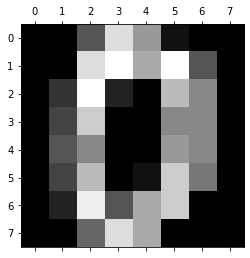

<Figure size 432x288 with 0 Axes>

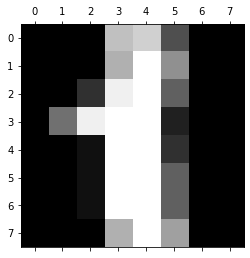

<Figure size 432x288 with 0 Axes>

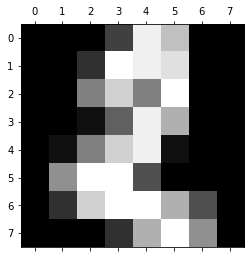

<Figure size 432x288 with 0 Axes>

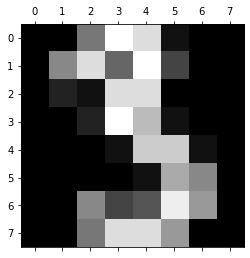

<Figure size 432x288 with 0 Axes>

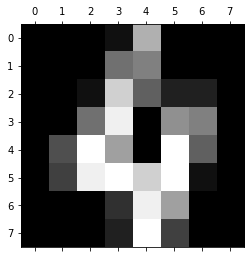

<Figure size 432x288 with 0 Axes>

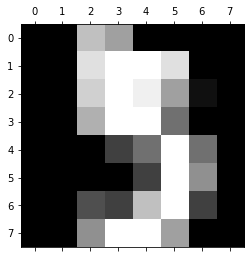

<Figure size 432x288 with 0 Axes>

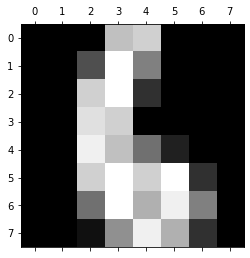

<Figure size 432x288 with 0 Axes>

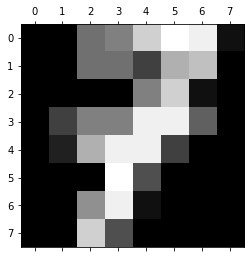

<Figure size 432x288 with 0 Axes>

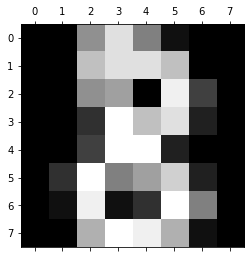

<Figure size 432x288 with 0 Axes>

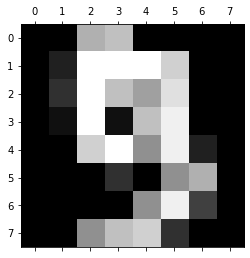

In [3]:
plt.gray() 

for i in range(10):
    plt.figure()
    plt.matshow(digits.data[i].reshape(8, 8))
    plt.show()
    

# 2A Plot the Cumulative explained variance ratio

[0.14890594 0.28509365 0.40303959 0.48713938 0.54496353 0.59413263
 0.6372925  0.67390623 0.70743871 0.73822677 0.76195018 0.78467714
 0.80289578 0.82063433 0.83530534 0.84940249 0.86258838 0.87506976
 0.88524694 0.89430312 0.9031985  0.91116973 0.91884467 0.9260737
 0.93303259 0.9389934  0.94474955 0.94990113 0.95479652 0.9590854
 0.96282146 0.96635421 0.96972105 0.97300135 0.97608455 0.97902234
 0.98158823 0.98386565 0.98608843 0.98820273 0.99010182 0.99168835
 0.99319995 0.99460574 0.99577196 0.99684689 0.99781094 0.99858557
 0.99914278 0.99954711 0.99975703 0.99983951 0.99989203 0.99994255
 0.99997555 0.99998798 0.99999503 0.99999804 0.99999911 0.99999966
 1.         1.         1.         1.        ]
The cumulative variance percentage explained by the first 2 PCA components is 28.51%
The cumulative variance percentage explained by the first 32 PCA components is 96.64%


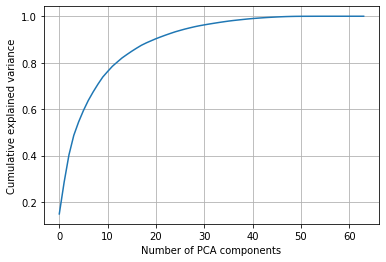

In [19]:
pca = PCA(n_components=64)
X_transformed = pca.fit_transform(X)
cumsum_var=np.cumsum(pca.explained_variance_ratio_)
print(cumsum_var)
plt.plot(range(64),cumsum_var)
plt.grid(True,which='both')
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative explained variance')

for i in [2,32]:
    print('The cumulative variance percentage explained by the first %i PCA components is %.2f%%'%(i,100*cumsum_var[i-1]) )

### 2B

The best 2 components explain about 28.5% of the variance.  (or put another way, by flattening the data onto the plan spanned by these two components, we only lose 71.5% of the variance)

### 2C  -- reconstructions with 2 PCA components

<Figure size 432x288 with 0 Axes>

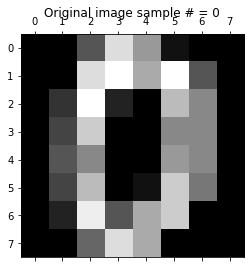

<Figure size 432x288 with 0 Axes>

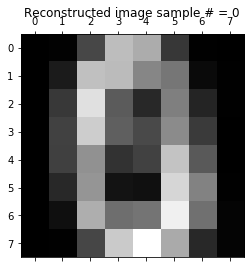

<Figure size 432x288 with 0 Axes>

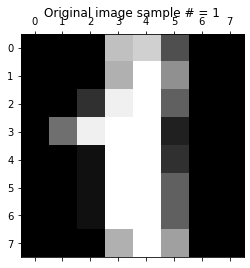

<Figure size 432x288 with 0 Axes>

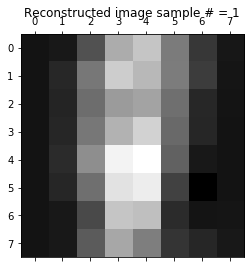

<Figure size 432x288 with 0 Axes>

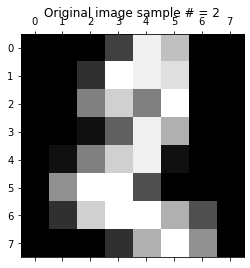

<Figure size 432x288 with 0 Axes>

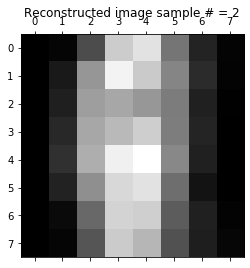

<Figure size 432x288 with 0 Axes>

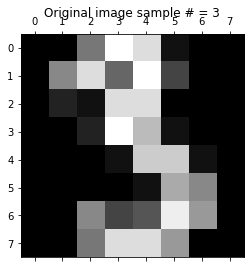

<Figure size 432x288 with 0 Axes>

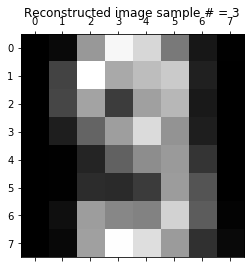

<Figure size 432x288 with 0 Axes>

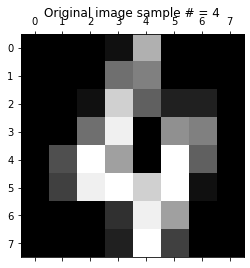

<Figure size 432x288 with 0 Axes>

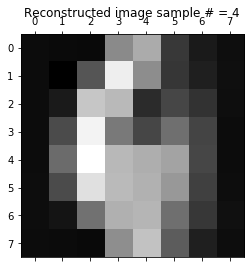

In [6]:
#now let's look at some images, reconstructed after only using 
# a few PCA dimensions

pca = PCA(n_components=2)

#first project from 64 dimensional (pixel) space 
#  to the 2 dimensional space spanned by the 
#  2 PCA components
#
# eg 'flatten the data'
X_transformed = pca.fit_transform(X)

# now project back to pixel space
# samples lie on that 2 dimensional plane
X_reproduce = pca.inverse_transform(X_transformed)

for i in range(5):
    plt.figure()
    plt.matshow(X[i].reshape(8, 8)) 
    plt.title('Original image sample # = %i'%(i))
    plt.show()
    plt.figure()
    plt.matshow(X_reproduce[i].reshape(8, 8))
    plt.title('Reconstructed image sample # = %i'%(i))
    plt.show()
    
# plt.show() 


### 2D 

The reconstructed images are quite blurry.  Some, like the 0, 3, and 4 you can still see the general shape.  For 1 and 2 it is too blurred.


## 2E  Use 32 components

The first 32 PCA components explain 96.6% of the variance.  That means that by flattening the 64 dimensional data on a carefully chosen 32 dimensional hyperplane, we don't actually have to 'flatten' the data much.  the data already is very close to being on that hyper-plane.  Thus, we can use half the number of features and explain almost all the variance.

<Figure size 432x288 with 0 Axes>

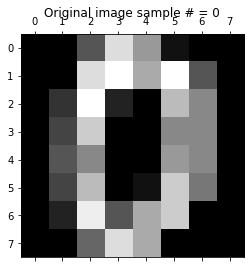

<Figure size 432x288 with 0 Axes>

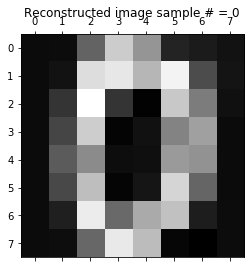

<Figure size 432x288 with 0 Axes>

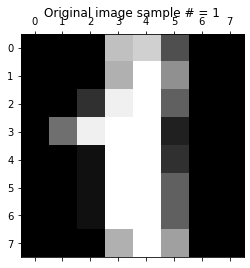

<Figure size 432x288 with 0 Axes>

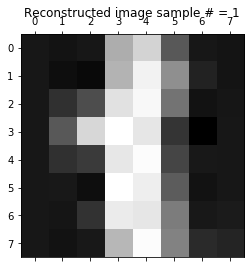

<Figure size 432x288 with 0 Axes>

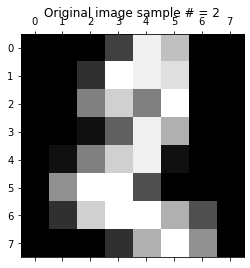

<Figure size 432x288 with 0 Axes>

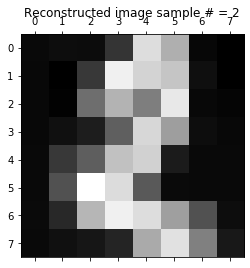

<Figure size 432x288 with 0 Axes>

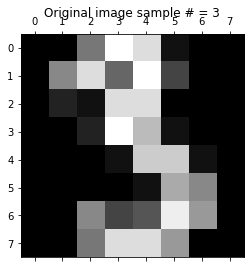

<Figure size 432x288 with 0 Axes>

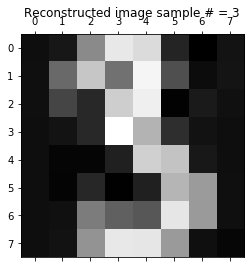

<Figure size 432x288 with 0 Axes>

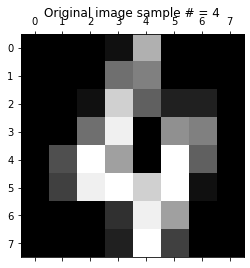

<Figure size 432x288 with 0 Axes>

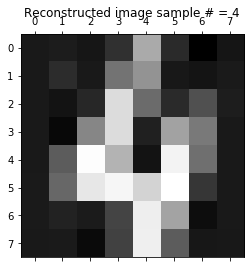

In [17]:
pca = PCA(n_components=32)

# project to the hyperplane, eg 'flatten'
X_transformed = pca.fit_transform(X)
# project back to 32 dim space
X_reproduce = pca.inverse_transform(X_transformed)

for i in range(5):
    plt.figure()
    plt.matshow(X[i].reshape(8, 8)) 
    plt.title('Original image sample # = %i'%(i))
    plt.show()
    plt.figure()
    plt.matshow(X_reproduce[i].reshape(8, 8))
    plt.title('Reconstructed image sample # = %i'%(i))
    plt.show()
    

The reconstructed images (using 32 PCA components) are almost identical to the original images.  There is a bit of fading (the pixels of the images are not quite as bright as the original) but that seems to be the main consequence of the little 'flattening' of the data that occured.  (those were likely pixels that were only bright for a few images, hence stuck out of the 32 dimensional hyperplane)